1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

The eigenvectors (using covariance matrix) are: 
 [[-0.11873906  0.56500829 -0.81649658]
 [-0.57325195 -0.71043334 -0.40824829]
 [-0.81073007  0.41958324  0.40824829]]

The eigenvalues (using covariance matrix) are: 
 [2.65969788e+01 2.00064686e+00 1.27874140e-15]

The eigenvectors (using SVD) are: 
 [[ 0.11878533  0.56499856 -0.81649658]
 [ 0.57319376 -0.71048029 -0.40824829]
 [ 0.81076443  0.41951684  0.40824829]]

The eigenvalues (using SVD) are: 
 [2.66151529e+01 2.00087031e+00 4.56648272e-30]

Do the two methods produce the same result?
Are the eigenvectors equal? ---->  False
Are the eigenvalues equal?  ---->  False


The total dataset is explained by the main component by a percentage of  93.00415048001287 %
This makes sense becuase x3 is defined deterministically from x1 and x2, while x2 is function of the sum between x1 and another random variable  

The new set of eigenvalues in reduced dimensionality is:  [26.59697883  2.00064686]
The total variability is retained by  100.0 

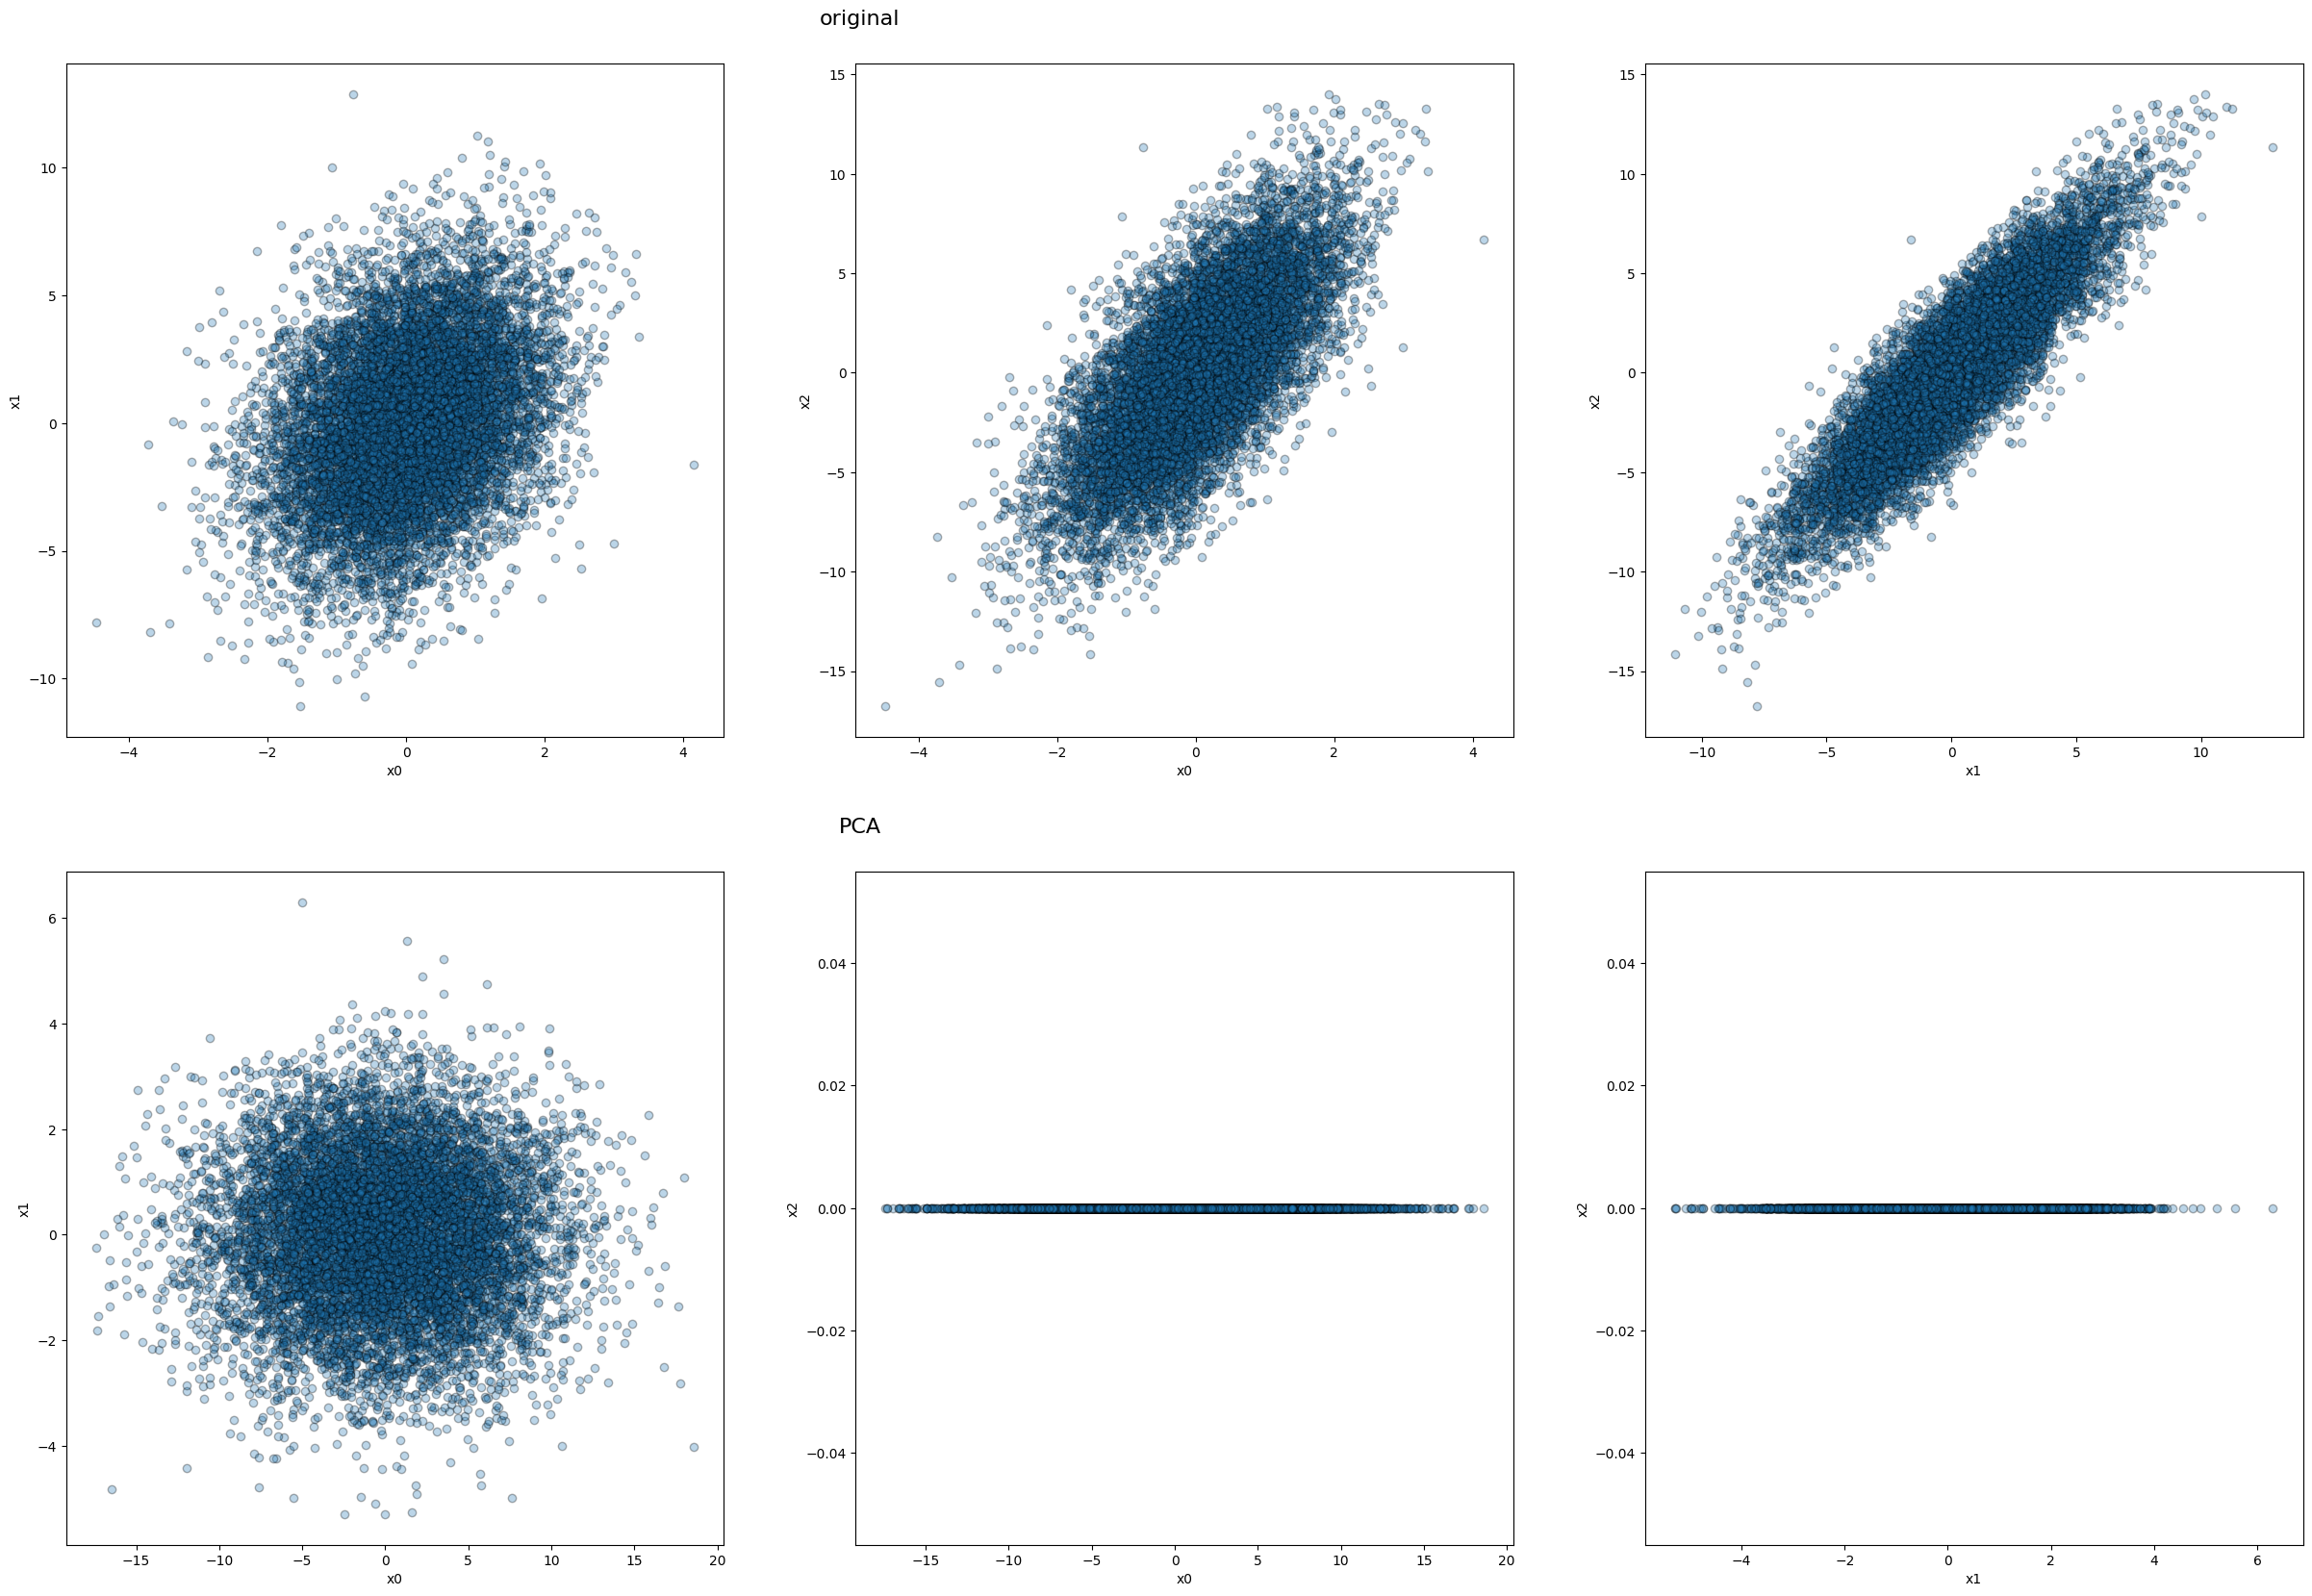

In [1]:
import numpy as np 
from numpy import linalg as la
from matplotlib import pyplot as plt

n = 10000

x1 = np.random.randn(n)
x2 = x1 + np.random.normal(0, 3, n)
x3 = 2*x1 + x2

X = np.array([x1, x2, x3]).T

np_cov = np.cov(X, rowvar=False)
l, v = la.eig(np_cov)
i_l = np.argsort(l)[::-1]
l = l[i_l]
v = v[:,i_l]

print('The eigenvectors (using covariance matrix) are: \n', v)
print('\nThe eigenvalues (using covariance matrix) are: \n', l)


U, S, Vt = la.svd(X)
l_svd = S**2/(n-1)

print('\nThe eigenvectors (using SVD) are: \n', Vt.T)
print('\nThe eigenvalues (using SVD) are: \n', l_svd)

print('\nDo the two methods produce the same result?')
print('Are the eigenvectors equal? ----> ', np.allclose(np.abs(Vt.T), np.abs(v)))
print('Are the eigenvalues equal?  ----> ', np.allclose(l, l_svd))


Lambda = np.diag(l)
trace_Lambda = np.trace(Lambda)
perc0 = Lambda[0,0]/trace_Lambda*100
print('\n\nThe total dataset is explained by the main component by a percentage of ', perc0,'%')
print('This makes sense becuase x3 is defined deterministically from x1 and x2, while x2 is function of the sum between x1 and another random variable  ')

frac_var = 1
updated_lambdas = l
while frac_var > 0.99:
    prec_lambdas = updated_lambdas
    updated_lambdas = prec_lambdas[:-1]
    frac_var = np.sum(updated_lambdas)/trace_Lambda
        
print('\nThe new set of eigenvalues in reduced dimensionality is: ', prec_lambdas)
print('The total variability is retained by ', np.sum(prec_lambdas)/trace_Lambda*100,'%')

new_eigvec = v[:,:len(prec_lambdas)]
new_X = np.dot(X, new_eigvec)
new_X = np.insert(new_X, 2, 0, axis=1)

fig, axs = plt.subplots(2, 3, figsize=(30,20))
axs[0,0].scatter(X[:,0], X[:,1], alpha=0.3, edgecolor='black')
axs[0,1].scatter(X[:,0], X[:,2], alpha=0.3, edgecolor='black')
axs[0,2].scatter(X[:,1], X[:,2], alpha=0.3, edgecolor='black')
axs[1,0].scatter(new_X[:,0], new_X[:,1], alpha=0.3, edgecolor='black')
axs[1,1].scatter(new_X[:,0], new_X[:,2], alpha=0.3, edgecolor='black')
axs[1,2].scatter(new_X[:,1], new_X[:,2], alpha=0.3, edgecolor='black')
axs[0,0].set_xlabel('x0')
axs[0,0].set_ylabel('x1')
axs[0,1].set_xlabel('x0')
axs[0,1].set_ylabel('x2')
axs[0,2].set_xlabel('x1')
axs[0,2].set_ylabel('x2')
axs[1,0].set_xlabel('x0')
axs[1,0].set_ylabel('x1')
axs[1,1].set_xlabel('x0')
axs[1,1].set_ylabel('x2')
axs[1,2].set_xlabel('x1')
axs[1,2].set_ylabel('x2')
fig.text(0.4, 0.9, 'original', ha='center', fontsize=16)
fig.text(0.4, 0.48, 'PCA', ha='center', fontsize=16)
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [2]:
import numpy as np 
from numpy import linalg as la

noise = np.random.normal(0, 0.05, size=(n,10))
X_noise = np.concatenate((X, noise), axis=1)

np_cov = np.cov(X_noise, rowvar=False)
l, v = la.eig(np_cov)
i_l = np.argsort(l)[::-1]
l = l[i_l]
v = v[:,i_l]

print('The eigenvectors (using covariance matrix) are: \n', v)
print('\nThe eigenvalues (using covariance matrix) are: \n', l)

Lambda = np.diag(l)
trace_Lambda = np.trace(Lambda)
perc0 = Lambda[0,0]/trace_Lambda*100
print('\n\nThe total dataset is explained by the main component by a percentage of ', perc0,'%')

frac_var = 1
updated_lambdas = l
while frac_var > 0.99:
    prec_lambdas = updated_lambdas
    updated_lambdas = prec_lambdas[:-1]
    frac_var = np.sum(updated_lambdas)/trace_Lambda
        
print('\nThe new set of eigenvalues in reduced dimensionality is: ', prec_lambdas)
print('The total variability is retained by ', np.sum(prec_lambdas)/trace_Lambda*100,'%')

print('We can notice that even if we add 10 variables representing noise, the percentage of retained variability remains almost the same. This is beacues the variables represe')

The eigenvectors (using covariance matrix) are: 
 [[-1.18739052e-01 -5.65007830e-01  2.45315806e-04 -4.90625713e-05
   8.63634681e-05  4.60958497e-05 -5.29015872e-04  8.41863386e-06
  -1.21276946e-04 -1.50904494e-04 -7.74769249e-05 -3.57339265e-04
   8.16496581e-01]
 [-5.73251928e-01  7.10432721e-01 -3.56154968e-04  6.27435981e-05
  -8.41217887e-05 -5.98768007e-05  6.20791257e-04  1.26185102e-04
   1.94484746e-04  1.33824008e-04  1.80766149e-04  5.26961888e-04
   4.08248290e-01]
 [-8.10730032e-01 -4.19582938e-01  1.34476643e-04 -3.53815445e-05
   8.86051474e-05  3.23148988e-05 -4.37240487e-04  1.43022370e-04
  -4.80691469e-05 -1.67984980e-04  2.58122991e-05 -1.87716642e-04
  -4.08248290e-01]
 [ 6.76959701e-05 -4.97084011e-04 -6.04472095e-02  1.57246270e-01
  -2.76036373e-01  6.46207697e-01  4.09225678e-01  4.12051742e-01
   3.53007931e-01  6.47017786e-02  9.76681444e-02 -4.73998614e-02
  -1.03897670e-16]
 [ 7.24545052e-05 -6.95366696e-04 -3.06378444e-01  2.51796914e-01
  -3.08741143e-0

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [3]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 